NAME: RISHI KUMAR

CWID -20015656

#### Q2)Using Matlab (or another tool), build/run/demo an SVM example ####  

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

# finding current directory

In [2]:
pwd

'C:\\Users\\Rishi'

# creating a dataframe out of csv

In [3]:
dataframe = pd.read_csv('C:\\Users\\Rishi\\Downloads\\cell_samples.csv')
dataframe.shape
dataframe.size
dataframe.count()
dataframe['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# distinguishing classes and plotting them 

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

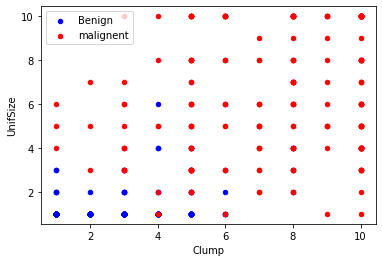

In [4]:
benign_df = dataframe[dataframe['Class']==2][0:200]
malignent_df = dataframe[dataframe['Class']==4][0:200]

axes= benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignent_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignent', ax=axes)

# transforming object into int value 

In [5]:
dataframe.dtypes
dataframe = dataframe[pd.to_numeric(dataframe['BareNuc'], errors='coerce').notnull()]
dataframe['BareNuc'] = dataframe['BareNuc'].astype('int')
dataframe.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# splitting the dataframe into attributes and outcomes

In [6]:
dataframe.columns
attribute_set= dataframe[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X = np.asarray(attribute_set)

Y = np.asarray(dataframe['Class'])


# creating training and testing data

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3, random_state=16)


# implemeting svm

In [8]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train,Y_train)
Y_predict = classifier.predict(X_test)

# evaluation results

In [9]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           2       0.99      0.96      0.97       139
           4       0.91      0.97      0.94        66

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

